In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

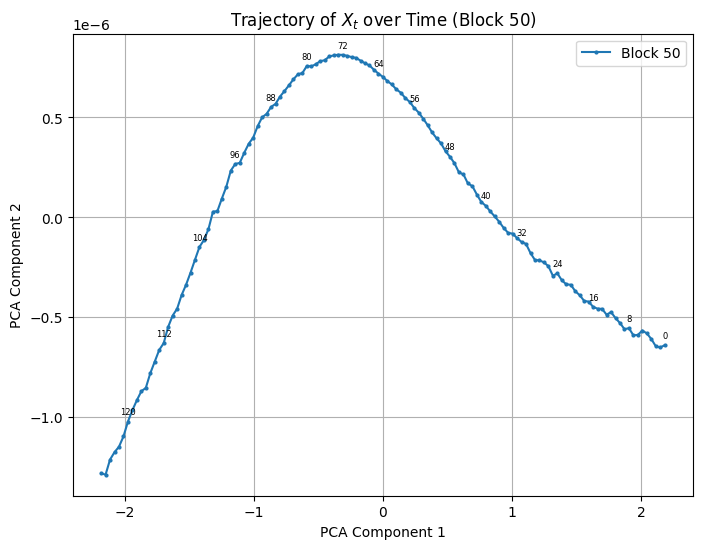

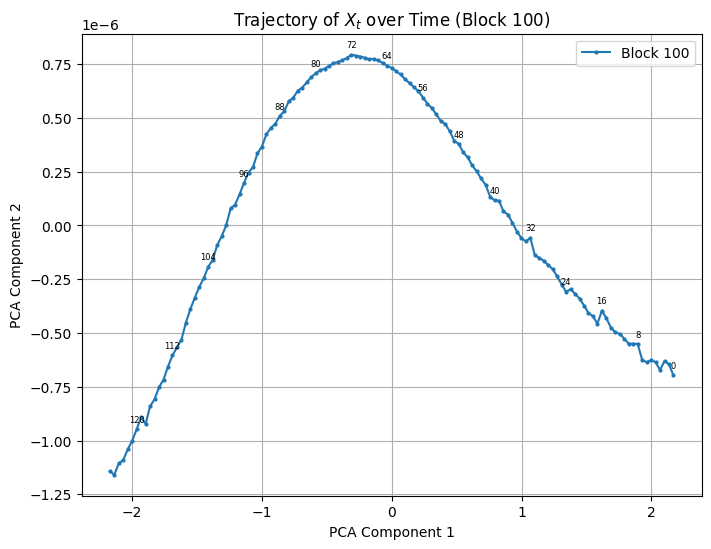

In [8]:
# Load the stored X_t evolution data (saved as a dictionary).
Xt_storage = np.load('Xt_storage.npy', allow_pickle=True).item()

# Iterate over each block in the storage.
for block_idx, xt_arr in Xt_storage.items():
    # xt_arr is expected to be a NumPy array with shape (63, 1, 1024)
    # Squeeze the dimension with size 1, so that the shape becomes (63, 1024)
    if xt_arr.ndim == 3:
        xt_arr = xt_arr[:, 5, :]
    
    
    # Reduce the 1024-dimensional data to 2D using PCA.
    pca = PCA(n_components=2)
    trajectory_2d = pca.fit_transform(xt_arr)
    
    # Plot the trajectory.
    plt.figure(figsize=(8, 6))
    plt.plot(trajectory_2d[:, 0], trajectory_2d[:, 1], marker='o', markersize=2, label=f'Block {block_idx}')
    
    # Annotate each time step on the trajectory for clarity.
    for t, (x, y) in enumerate(trajectory_2d[::8]):
        plt.annotate(str(t*8), (x, y), textcoords="offset points", xytext=(0, 5),
                     ha='center', fontsize=6)
    
    plt.title(f'Trajectory of $X_t$ over Time (Block {block_idx})')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.legend()
    plt.show()